### Model

In [1]:
#Creating the model for I=g*V
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
def ohm_law_model(voltage, specific_conductance, temperature_variance, length, cross_sectional_area, time, usage_intensity, handling_carelessness, storage_location, electron_mobility, density):
    cross_sectional_area = (cross_sectional_area)*(1-((0.03*time)+(0.56*usage_intensity)+(0.1*handling_carelessness)+(0.01*storage_location)))
    length = (length)*(1+((0.002*time)+(-0.21*usage_intensity)+(0.32*handling_carelessness)+(0.12*storage_location)))                                                 
    specific_conductance = specific_conductance*(1+((-0.62)*(temperature_variance**2))+(0.26*(electron_mobility))+(-0.42*(density)))
    current = (voltage*cross_sectional_area*specific_conductance)/length
    ohm_law_df = pd.DataFrame([[voltage, current, current/voltage]], columns = ['Voltage','Current','Current/Voltage'])
    return ohm_law_df
    

### Creating 2 parameter sets

In [2]:
#Creating dataset 1
df_1 = ohm_law_model(24, 3.1, 0.14, 9, 0.175, 0.42, 0.07, 0.081, 0.032, 0.011, 0.039)

In [3]:
df_1

,Voltage,Current,Current/Voltage
0,24,1.303914,0.05433


In [4]:
#Creating dataset2
df_2 = ohm_law_model(94, 10, 0.4, 7, 0.125, 0.82, 0.07, 0.61, 0.5, 0.0121, 0.39)

In [5]:
df_2

,Voltage,Current,Current/Voltage
0,94,8.703737,0.092593


In [6]:
#Appending dataset2 to dataset1
df_final = df_1.append(df_2, ignore_index=True)
df_final

,Voltage,Current,Current/Voltage
0,24,1.303914,0.054330
1,94,8.703737,0.092593


### Estimating g for the 2 parameter sets generated above

In [7]:
#Estimating g by calculating the average
g_average = df_final['Current/Voltage'].mean()
g_average

0.07346134461538863

In [8]:
#Estimating g using min-square method
#As (((I1-(g*V1))^2)+((I2-(g*V2))^2)) should be minimum, g = (I2*V2 + I1*V1)/((V1^2)+(V2^2)
g_min_square = ((df_final['Current'][0]*df_final['Voltage'][0])+(df_final['Current'][1]*df_final['Voltage'][1]))/((df_final['Voltage'][0]**2)+(df_final['Voltage'][1]**2))
g_min_square

0.09025129631868442

In [9]:
#Estimating g by doing (total_current)/(total_voltage)
g_est = (df_final['Current'].sum())/(df_final['Voltage'].sum())
g_est

0.08481059953002666

In [10]:
#Initialising empty dataframe for future use
df = pd.DataFrame(columns=['Voltage','Current','Current/Voltage'])
df

,Voltage,Current,Current/Voltage


### Using the model for 100 parameter sets

In [11]:
#Creating 100 parameter sets
import random
for x in range (0,100):
    volt = random.uniform(5,7)
    spec_conductance = random.uniform(2, 4)
    length = random.uniform(3,5)
    variables = np.random.rand(1,8)
    df_entry = ohm_law_model(volt, spec_conductance, variables[0][0], length, variables[0][1], variables[0][2], variables[0][3], variables[0][4], variables[0][5], variables[0][6], variables[0][7])
    df = df.append(df_entry, ignore_index=True)

In [12]:
df

,Voltage,Current,Current/Voltage
0,5.690774,0.674748,0.118569
1,5.296815,0.731416,0.138086
2,5.649467,0.292333,0.051745
3,6.483099,0.981675,0.151421
4,6.400294,0.102385,0.015997
...,...,...,...
95,5.266162,3.035324,0.576383
96,5.894444,0.104021,0.017647
97,5.152702,0.993404,0.192793
98,5.433725,0.021054,0.003875


### Estimating g for 100 parameter sets

In [13]:
#Estimating g by calculating average
g_mean = df['Current/Voltage'].mean()
g_mean

0.1517005536171174

In [14]:
#Estimating g using min-square method
sum_of_product = 0
sum_of_squares = 0
for x in range (0,100):
    sum_of_product = sum_of_product + (df['Current'][x]*df['Voltage'][x])
    sum_of_squares = sum_of_squares + (df['Voltage'][x]**2)
g_min_square_2 = sum_of_product/sum_of_squares
g_min_square_2

0.14831789878804544

In [15]:
#Estimating g by doing (total current)/(total voltage)
g_est_avg = df['Current'].sum()/df['Voltage'].sum()
g_est_avg

0.1499122755284444

### Visualizing the 100 parameter sets

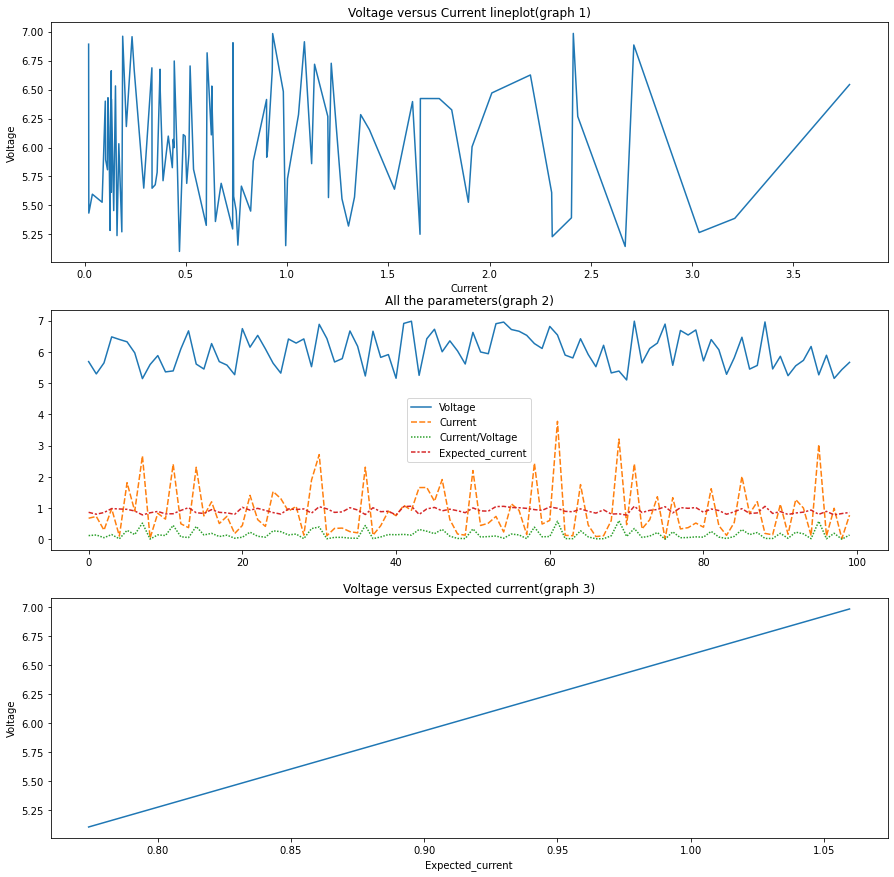

In [16]:

df['Expected_current'] = g_mean*df['Voltage']
fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].set_title("Voltage versus Current lineplot(graph 1)")
axs[1].set_title("All the parameters(graph 2)")
axs[2].set_title("Voltage versus Expected current(graph 3)")
sb.lineplot(x=df['Current'], y=df['Voltage'], ax=axs[0]);
sb.lineplot(data=df, ax=axs[1]);
sb.lineplot(x=df['Expected_current'], y=df['Voltage'],ax=axs[2]);

### Conclusion from the above graphs
- Current versus Voltage is not a constant in the second graph, which means ohm's law is being violated(from graph 2)
- Expected current matches actual current for higher voltages(from graph-2)
- Variation in actual current is way larger than expected current(from graph-2)
- The value of g estimated from taking the average of (Current/Voltage) is identical to value of g obtained from minimum square method as the Current/Voltage value has significantly low variance.

### Learning takeaways from the assignment
- Creating a model with parameters.
- Using the model to get outputs.
- Estimating outputs by taking average and using minimum square method.
- Generating a large number of random parameter sets and incorporating them to the created model.
- Visualizing the output sets to evaluate the difference between the hypothesized model and the actual "scientific" model.